# Тестовый стенд

# Данные

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("timestamps2.txt") as file:
    t = [int(x) for x in file]
print(t)

[3476, 3463, 3487, 3479, 3472, 3483, 3468, 3476, 3469, 3470, 3462, 3467, 3470, 3469, 3464, 3467, 3464, 3468, 3472, 3467, 3466, 3470, 3471, 3456, 3486, 3479, 3460, 3474, 3483, 3461, 3470, 3464, 3467, 3462, 3463, 3470, 3460, 3462, 3473]


(array([1., 6., 5., 7., 8., 4., 2., 2., 2., 2.]),
 array([3456. , 3459.1, 3462.2, 3465.3, 3468.4, 3471.5, 3474.6, 3477.7,
        3480.8, 3483.9, 3487. ]),
 <BarContainer object of 10 artists>)

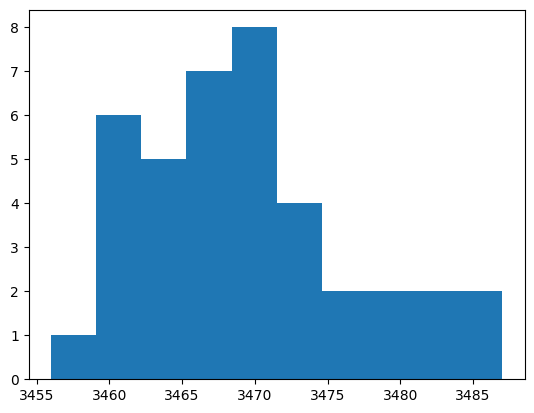

In [3]:
plt.hist(t)

# Тесты на нормальность

In [4]:
normaltest = stats.normaltest(t)
shapirotest = stats.shapiro(t)
print(f'p-value теста на нормальное распределение: {normaltest.pvalue}')
print(f'p-value теста Шапиро-Уилка: {shapirotest.pvalue}')
if normaltest.pvalue > 0.05 or shapirotest.pvalue > 0.05:
    print("Тест на нормальность пройден (p-value > 0.05 хотя бы на одном тесте)")
else: 
    print("Тест на нормальность не пройден (p-value < 0.05)")

p-value теста на нормальное распределение: 0.17755044937047604
p-value теста Шапиро-Уилка: 0.08656836301088333
Тест на нормальность пройден (p-value > 0.05 хотя бы на одном тесте)


# Среднее и стандартное отклонение

In [5]:
mean = np.mean(t)
print(f'Среднее - {mean}')

Среднее - 3469.4871794871797


In [6]:
std = np.std(t, ddof=1)
print(f'Стандартное отклонение - {std}')

Стандартное отклонение - 7.3944210650996345


In [7]:
print(f'Стандартное отклонение составляет {std/mean * 100} процентов от среднего')

Стандартное отклонение составляет 0.21312720533507185 процентов от среднего


# Доверительный интервал

In [8]:
conf = stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)
print(f'Неокругленный разброс: {conf}')

Неокругленный разброс: 2.3969940196038806


In [9]:
roundedConf = round(conf)
print(f'Округленный разброс доверительного интервала: {roundedConf}')
roundedMeanConf = round(mean)
print(f'Округленное среднее: {roundedMeanConf}')
print(f'95% Доверительный интервал: {roundedMeanConf} ± {roundedConf}')

Округленный разброс доверительного интервала: 2
Округленное среднее: 3469
95% Доверительный интервал: 3469 ± 2


# Предсказывающий интервал

In [10]:
pred = std * 2
print(f'Неокругленный разброс: {pred}')

Неокругленный разброс: 14.788842130199269


In [11]:
roundedPred = round(pred)
print(f'Округленный разброс доверительного интервала: {roundedPred}')
roundedMeanPred = round(mean)
print(f'Округленное среднее: {roundedMeanPred}')
print(f'95% Доверительный интервал: {roundedMeanPred} ± {roundedPred}')

Округленный разброс доверительного интервала: 15
Округленное среднее: 3469
95% Доверительный интервал: 3469 ± 15
